In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import scipy.stats as stats

In [6]:
import statsmodels.api as sm

In [7]:
%matplotlib inline

In [8]:
gdp_df = pd.read_csv('data/gdp_per_capita.csv', nrows=6500)

In [9]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6495,Zimbabwe,1994,2768.309953,NaN
6496,Zimbabwe,1993,2572.870395,NaN
6497,Zimbabwe,1992,2591.007534,NaN
6498,Zimbabwe,1991,2906.272849,NaN
6499,Zimbabwe,1990,2819.549467,NaN


In [10]:
gdp_df.shape

(6500, 4)

6501 rows and 4 columns

In [11]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

In [12]:
gdp_df=gdp_df.drop(columns='Value Footnotes')

In [13]:
gdp_df=gdp_df.rename(columns={'Value':'GDP_Per_Capita'})

In [14]:
continent_df=pd.read_csv('data/continents.csv')

In [15]:
gdp_df=gdp_df.rename(columns={'Country or Area':'Country'})

In [16]:
gdp_df.replace({'Country': {"CÃƒÂ´te d'Ivoire":"Ivory Coast"}})

,Country,Year,GDP_Per_Capita
0,Afghanistan,2017,1758.465636
1,Afghanistan,2016,1757.023490
2,Afghanistan,2015,1766.593077
3,Afghanistan,2014,1795.735834
4,Afghanistan,2013,1807.762344
5,Afghanistan,2012,1772.764974
6,Afghanistan,2011,1626.764793
7,Afghanistan,2010,1671.581238
8,Afghanistan,2009,1502.354073
9,Afghanistan,2008,1267.644939


In [17]:
gdp_df.replace({'Country':{"CuraÃ§ao":"Curaçao"}})

,Country,Year,GDP_Per_Capita
0,Afghanistan,2017,1758.465636
1,Afghanistan,2016,1757.023490
2,Afghanistan,2015,1766.593077
3,Afghanistan,2014,1795.735834
4,Afghanistan,2013,1807.762344
5,Afghanistan,2012,1772.764974
6,Afghanistan,2011,1626.764793
7,Afghanistan,2010,1671.581238
8,Afghanistan,2009,1502.354073
9,Afghanistan,2008,1267.644939


In [18]:
gdp_df.replace({'Country':{"SÃ£o TomÃ© and Principe":"Sao Tome and Principe"}})

,Country,Year,GDP_Per_Capita
0,Afghanistan,2017,1758.465636
1,Afghanistan,2016,1757.023490
2,Afghanistan,2015,1766.593077
3,Afghanistan,2014,1795.735834
4,Afghanistan,2013,1807.762344
5,Afghanistan,2012,1772.764974
6,Afghanistan,2011,1626.764793
7,Afghanistan,2010,1671.581238
8,Afghanistan,2009,1502.354073
9,Afghanistan,2008,1267.644939


In [19]:
gdp_df.replace({'Country':{"Sint Maarten (Dutch part)":"Sint Maarten"}})

,Country,Year,GDP_Per_Capita
0,Afghanistan,2017,1758.465636
1,Afghanistan,2016,1757.023490
2,Afghanistan,2015,1766.593077
3,Afghanistan,2014,1795.735834
4,Afghanistan,2013,1807.762344
5,Afghanistan,2012,1772.764974
6,Afghanistan,2011,1626.764793
7,Afghanistan,2010,1671.581238
8,Afghanistan,2009,1502.354073
9,Afghanistan,2008,1267.644939


In [20]:
gdp_df = pd.merge(gdp_df,continent_df, on='Country')

In [21]:
continent_df.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [22]:
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2017,1758.465636,Asia
1,Afghanistan,2016,1757.023490,Asia
2,Afghanistan,2015,1766.593077,Asia
3,Afghanistan,2014,1795.735834,Asia
4,Afghanistan,2013,1807.762344,Asia


In [23]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5154 entries, 0 to 5153
Data columns (total 4 columns):
Country           5154 non-null object
Year              5154 non-null int64
GDP_Per_Capita    5154 non-null float64
Continent         5154 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 201.3+ KB


In [24]:
%%time
gdp_df.groupby('Continent').GDP_Per_Capita.mean()

CPU times: user 4.63 ms, sys: 2.13 ms, total: 6.77 ms
Wall time: 24.5 ms


Continent
Africa            4648.880050
Asia             21174.893215
Europe           26497.245133
North America    18841.842653
Oceania           8818.318792
South America    10989.950644
Name: GDP_Per_Capita, dtype: float64

In [25]:
gdp_df = gdp_df.astype({"Continent": 'category'})

In [26]:
%%time
gdp_df.groupby('Continent').GDP_Per_Capita.mean()

CPU times: user 3.27 ms, sys: 2.04 ms, total: 5.31 ms
Wall time: 5.28 ms


Continent
Africa            4648.880050
Asia             21174.893215
Europe           26497.245133
North America    18841.842653
Oceania           8818.318792
South America    10989.950644
Name: GDP_Per_Capita, dtype: float64

In [27]:
gdp_df.groupby('Continent')['Country'].count()

Continent
Africa           1355
Asia             1183
Europe           1202
North America     716
Oceania           365
South America     333
Name: Country, dtype: int64

In [28]:
y=gdp_df.groupby('Continent')['Country'].count()
x=column='Continent'

Text(0, 0.5, 'Number of Countries')

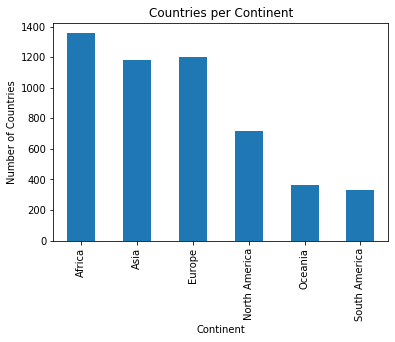

In [29]:
gdp_df.groupby('Continent')['Country'].count().plot(kind='bar',title='Countries per Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Countries')

In [30]:
gdp_df.groupby('Continent')['Country'].count().sum()

5154

In [31]:
gdp_df.groupby('Year').count()

,Country,GDP_Per_Capita,Continent
Year,,,
1990,165,165,165
1991,166,166,166
1992,168,168,168
1993,170,170,170
1994,173,173,173
1995,179,179,179
1996,179,179,179
1997,181,181,181
1998,182,182,182


In [32]:
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2017,1758.465636,Asia
1,Afghanistan,2016,1757.023490,Asia
2,Afghanistan,2015,1766.593077,Asia
3,Afghanistan,2014,1795.735834,Asia
4,Afghanistan,2013,1807.762344,Asia


In [33]:
gdp_2014=gdp_df.loc[gdp_df['Year'] == 2014]

In [34]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,189.0,189.000000
mean,2014.0,18832.939563
std,0.0,20801.414367
min,2014.0,377.908916
25%,2014.0,4162.166942
50%,2014.0,11887.389712
75%,2014.0,26258.194481
max,2014.0,130439.187070


In [35]:
gdp_2014.sort_values(by=['GDP_Per_Capita'])

,Country,Year,GDP_Per_Capita,Continent
2904,Mauritania,2014,377.908916,Africa
896,Central African Republic,2014,676.675821,Africa
739,Burundi,2014,768.469837,Africa
1199,Dem. Rep. Congo,2014,784.872656,Africa
3323,Niger,2014,900.136918,Africa
3116,Mozambique,2014,1117.872529,Africa
2741,Malawi,2014,1142.530804,Africa
2597,Liberia,2014,1257.625441,Africa
2713,Madagascar,2014,1372.015959,Africa
1497,Ethiopia,2014,1413.962518,Africa


In [36]:
gdp_2014=gdp_2014.assign(GDP_Group=pd.cut(gdp_2014['GDP_Per_Capita'], bins=[0,4162.17,26258.19,130439.19], include_lowest=True, labels=['low','med','high']))

In [37]:
gdp_2014.head()

,Country,Year,GDP_Per_Capita,Continent,GDP_Group
3,Afghanistan,2014,1795.735834,Asia,low
19,Albania,2014,10700.522802,Europe,med
47,Algeria,2014,13549.025150,Africa,med
75,Angola,2014,6813.052106,Africa,med
103,Antigua and Barbuda,2014,20820.551057,North America,med


In [38]:
gdp_2014.groupby(['Continent','GDP_Group'])['GDP_Group'].count()

Continent      GDP_Group
Africa         low          32
               med          16
               high          1
Asia           low           7
               med          24
               high         13
Europe         med          21
               high         24
North America  low           2
               med          15
               high          8
Oceania        low           7
               med           5
               high          2
South America  med          12
Name: GDP_Group, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1d69a240>]],
      dtype=object)

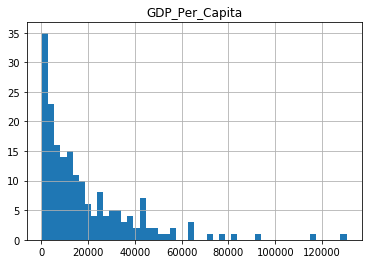

In [39]:
gdp_2014.hist(column='GDP_Per_Capita', bins=50)

The histogram is skewed right which mean the data has a boundary at zero ($0) and the majority of countries had a lower GDP. 

In [40]:
gdp_2014.skew(axis = 0)

Year              0.000000
GDP_Per_Capita    2.248245
dtype: float64

df.Skew() returns unbiased skew over requested axis Normalized by N-1. Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.

In [41]:
import seaborn as sns

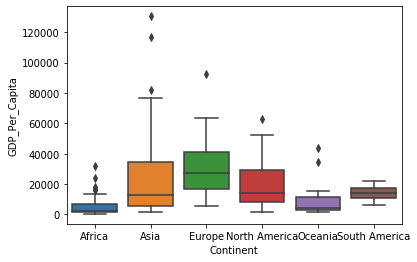

In [42]:
sns.boxplot( x=gdp_2014["Continent"], y=gdp_2014["GDP_Per_Capita"] )

In [43]:
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2017,1758.465636,Asia
1,Afghanistan,2016,1757.023490,Asia
2,Afghanistan,2015,1766.593077,Asia
3,Afghanistan,2014,1795.735834,Asia
4,Afghanistan,2013,1807.762344,Asia


In [44]:
gdp_df_pivot=gdp_df.pivot(index='Country',columns="Year",values="GDP_Per_Capita")

In [45]:
gdp_df_pivot.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1267.644939,1502.354073,1671.581238,1626.764793,1772.764974,1807.762344,1795.735834,1766.593077,1757.023490,1758.465636
Albania,4458.247662,3229.250516,3015.391747,3323.864796,3622.007546,4129.975847,4533.894914,4064.133302,4450.923069,5056.567135,...,9154.714872,9525.372374,9927.631333,10207.753519,10369.562385,10492.670315,10700.522802,10971.046329,11356.719009,11803.283883
Algeria,10297.842349,9927.003266,9870.942241,9451.329091,9174.299927,9342.777721,9556.806523,9507.117532,9843.132467,10015.260962,...,12707.831354,12694.745562,12920.751516,13046.369962,13226.025385,13322.569483,13549.025150,13774.299412,13939.940523,13876.294642
Angola,4761.229638,4651.204299,4238.318419,3118.903488,3060.336207,3407.974524,3747.164004,3892.473420,3945.594930,3902.774196,...,6474.376423,6292.534856,6360.441938,6346.395122,6645.085625,6730.945822,6813.052106,6644.857255,6258.376628,6044.972035
Antigua and Barbuda,17472.946483,17616.926677,17515.821953,18074.531028,18871.807320,17663.771366,18427.111846,19020.307728,19506.709858,19837.177345,...,26110.658806,22592.413330,20660.418279,19953.192771,20388.798658,20121.250141,20820.551057,21426.324931,22393.996146,22855.748017


In [72]:
gdp_df_pivot.columns

Int64Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017],
           dtype='int64', name='Year')

In [73]:
gdp_df.columns

Index(['Country', 'Year', 'GDP_Per_Capita', 'Continent'], dtype='object')

In [75]:
gdp_df_pivot=gdp_df_pivot.loc[:,[1990,2017]]

In [76]:
gdp_df_pivot=gdp_df_pivot.dropna()

In [80]:
print(gdp_df_pivot)

Year                                     1990          2017
Country                                                    
Albania                           4458.247662  11803.283883
Algeria                          10297.842349  13876.294642
Angola                            4761.229638   6044.972035
Antigua and Barbuda              17472.946483  22855.748017
Argentina                        11372.823108  18945.144022
Armenia                           3742.431024   8744.731368
Aruba                            37140.024657  35861.828118
Australia                        28669.495478  44888.019991
Austria                          31341.902381  45493.045346
Azerbaijan                        8789.714530  15929.399631
Bahrain                          35113.332939  43320.440359
Bangladesh                        1325.592071   3634.316954
Barbados                         14122.904844  16839.000583
Belarus                           8366.632185  17193.424143
Belgium                          30647.8